In [ ]:
# loading required library
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("BrainTumor.csv")
df.columns

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

In [ ]:
# droping some column from data set 
dfMod=df.drop(['Image','Mean','Variance','Standard Deviation'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [ ]:
target=['Non-Tumor','Tumor']
print("Tagret to classify after training: ",target)

Tagret to classify after training:  ['Non-Tumor', 'Tumor']


In [ ]:
dfMod['ClassName'] =dfMod.Class.apply(lambda x: target[x])

In [ ]:
print("\n printing first five data from dataframe with taget equal to 0:\n")
dfMod[dfMod.Class==0].head()



 printing first five data from dataframe with taget equal to 0:



,Class,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,ClassName
0,0,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155,Non-Tumor
1,0,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155,Non-Tumor
4,0,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155,Non-Tumor
5,0,0.214086,3.729886,14.471736,105.077882,0.421587,0.177736,0.598169,4.193146,0.976485,7.458341e-155,Non-Tumor
6,0,0.128833,2.930095,8.969348,115.203118,0.320675,0.102832,0.532292,4.880320,0.974745,7.458341e-155,Non-Tumor


In [ ]:
print("\n printing first five data from dataframe with taget equal to 1:\n")
dfMod[dfMod.Class==1].head()


 printing first five data from dataframe with taget equal to 1:



,Class,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,ClassName
2,1,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155,Tumor
3,1,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155,Tumor
9,1,0.003002,4.365000,19.682514,72.588783,0.045685,0.002087,0.361432,4.590795,0.967830,7.458341e-155,Tumor
10,1,0.002436,3.872728,15.552862,66.285462,0.041140,0.001692,0.375618,4.626763,0.968750,7.458341e-155,Tumor
11,1,0.003769,3.623978,14.762270,165.484791,0.051321,0.002634,0.385292,5.215436,0.958601,7.458341e-155,Tumor


In [ ]:
from sklearn.model_selection import train_test_split
# Droping un-nessasery data and considering important data for training in x
X_train, X_test, y_train, y_test = train_test_split(dfMod.drop(['Class','ClassName'],axis=1), 
                                                    dfMod.Class, test_size=0.2)

In [ ]:
# Creating training dataframe from splited data
df_train=pd.concat([X_train,y_train],axis=1)
df_train.head()

,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
3451,0.087369,2.434145,6.247947,35.741306,0.260118,0.067661,0.577855,2.528414,0.968778,7.458341e-155,0
668,0.118767,2.311993,5.705507,37.470235,0.306151,0.093728,0.644471,2.142201,0.970129,7.458341e-155,0
858,0.228615,3.427235,12.336712,75.438631,0.436791,0.190786,0.636244,3.027192,0.970684,7.458341e-155,0
1183,0.149967,3.150357,10.415505,122.097744,0.347820,0.120979,0.583496,4.227600,0.974683,7.458341e-155,0
1320,0.087760,2.956084,9.040885,119.694892,0.261141,0.068194,0.509852,4.811660,0.943897,7.458341e-155,0


In [ ]:
df_test=pd.concat([X_test,y_test],axis=1)
df_test.head()

,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
2106,0.023301,3.190422,11.090258,26.877230,0.130422,0.017010,0.523915,2.418267,0.973638,7.458341e-155,1
1047,0.012343,3.022831,10.228869,109.042698,0.093956,0.008828,0.474410,3.548082,0.961698,7.458341e-155,1
1054,0.002490,9.176305,86.963692,133.712963,0.041594,0.001730,0.223086,7.261574,0.922782,7.458341e-155,1
3076,0.002886,5.209032,28.188535,49.935484,0.044787,0.002006,0.349123,4.144516,0.980144,7.458341e-155,1
42,0.226580,3.368116,11.680052,92.010839,0.434381,0.188687,0.677492,2.781818,0.973939,7.458341e-155,0


In [ ]:
model = LogisticRegression(max_iter=4000)
model.fit(X_train,y_train)
# Predicting test data and comparing with actual data 
df_test['Predicted_Class'] = model.predict(X_test)
df_test[['Class','Predicted_Class']]

,Class,Predicted_Class
2106,1,1
1047,1,1
1054,1,1
3076,1,1
42,0,0
...,...,...
1971,0,0
3167,1,0
3165,1,1
1453,0,0


In [ ]:
# As we know for logistic regression, if probebility is more then 0.5 then  
# then output would be 1 and if probability is less then 0.5 then output would 
# be zero. Calculating probabilty of test data based on learned model.
model.predict_proba(X_test)

array([[4.87286408e-01, 5.12713592e-01],
       [2.51406472e-01, 7.48593528e-01],
       [2.69693529e-04, 9.99730306e-01],
       ...,
       [1.72650743e-01, 8.27349257e-01],
       [9.51875200e-01, 4.81247996e-02],
       [9.98118145e-01, 1.88185523e-03]])

In [ ]:
# finding accuracy of trained model with splitted test data set using score method
print("Accuracy of Trained model is: ",model.score(X_test,y_test))

Accuracy of Trained model is:  0.9774236387782205


In [ ]:
print("Predicting value for [[0.3,3.5,15,150,0.5,0.06,0.6,5,0.99,8]] using trained model:" , target[model.predict([[0.3,3.5,15,150,0.5,0.06,0.6,5,0.99,8]])[0]])

Predicting value for [[0.3,3.5,15,150,0.5,0.06,0.6,5,0.99,8]] using trained model: Non-Tumor


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[417,   2],
       [ 15, 319]])

Text(51.0, 0.5, 'Truth')

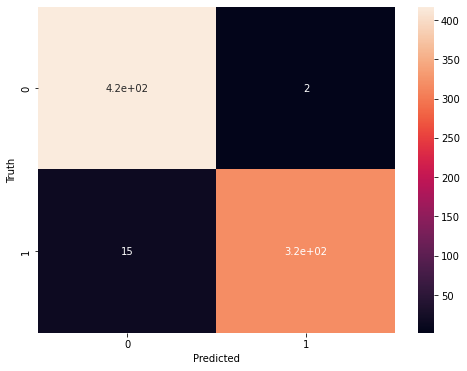

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       419
           1       0.99      0.96      0.97       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1660
           1       0.99      0.94      0.96      1349

    accuracy                           0.97      3009
   macro avg       0.97      0.97      0.97      3009
weighted avg       0.97      0.97      0.97      3009

